In [1]:
from anscombe import *

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def estatisticas(img):
    print('Média: %.2f, variância: %.2f, desvio padrão: %.2f, mínimo: %.2f e máximo: %.2f' % (img.mean(), np.var(img), img.std(), img.min(), img.max()))

In [3]:
def show(img):
    plt.figure(figsize=(8,6))
    plt.imshow(img, cmap='gray', interpolation='nearest')

In [4]:
def show_color(img):
    plt.figure(figsize=(8,6))
    plt.imshow(img, interpolation='nearest')

In [5]:
def normalizar(img, intervalo=(0,255)) -> np.ndarray:
    """
    Retorna a imagem normalizada para um dado intervalo.
    """
    return cv2.normalize(img, None, alpha = intervalo[0], beta = intervalo[1], norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

In [6]:
def histograma_colorido(imagem, intervalo=(0, 256)):
    """ 
    Histograma para imagem colorida (RGB).
    """
    
    color = ('b','g','r')
    
    fig, ax = plt.subplots(3,1, figsize=(12,8))
    
    for i,col in enumerate(color):
        histr = cv2.calcHist([imagem],[i],None,[intervalo[1]],[intervalo[0],intervalo[1]])
        ax[i].plot(histr, color = col)
        ax[i].set_xlim([intervalo[0],intervalo[1]])
#         plt.plot(histr,color = col)
#         plt.xlim([intervalo[0],intervalo[1]])
    plt.show()

In [7]:
def histograma(imagem, intervalo=(0, 256)):
    plt.figure(figsize=(12,8))
    
    histr = cv2.calcHist([imagem],[0],None,[intervalo[1]],[intervalo[0],intervalo[1]])
    plt.plot(histr, color = 'b')
    plt.xlim([intervalo[0],intervalo[1]])
    plt.show()

In [8]:
img = cv2.imread('3096.jpg', cv2.IMREAD_GRAYSCALE)
img.shape

(321, 481)

In [43]:
noisy = np.random.poisson(lam=img*255, size=None)

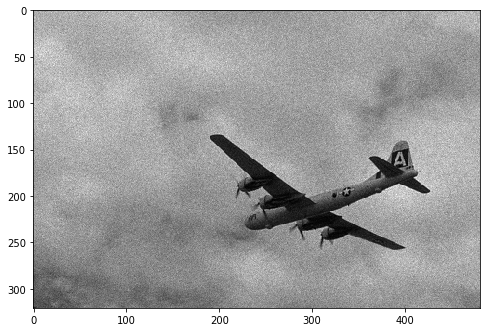

In [44]:
show(noisy)

In [45]:
estatisticas(noisy)
noisy.dtype

Média: 170.40, variância: 1537.01, desvio padrão: 39.20, mínimo: 0.00 e máximo: 286.00


dtype('int32')

In [47]:
estatisticas(img*255)

Média: 170.39, variância: 1370.04, desvio padrão: 37.01, mínimo: 0.00 e máximo: 255.00


In [12]:
estatisticas(img)

Média: 118.27, variância: 660.09, desvio padrão: 25.69, mínimo: 0.00 e máximo: 177.00


In [52]:
ans = anscombe(noisy)

In [53]:
estatisticas(ans)

Média: 25.86, variância: 14.12, desvio padrão: 3.76, mínimo: 1.22 e máximo: 33.85


In [54]:
ans2 = anscombe(img*255)

In [56]:
estatisticas(ans-ans2)

Média: -0.02, variância: 1.00, desvio padrão: 1.00, mínimo: -4.61 e máximo: 4.29


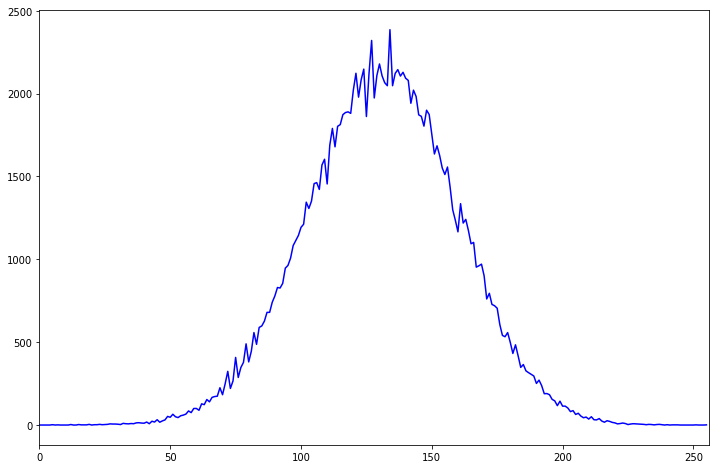

In [58]:
histograma(normalizar(ans-ans2))

In [60]:
estatisticas(noisy-img*255)


Média: 0.01, variância: 170.07, desvio padrão: 13.04, mínimo: -57.41 e máximo: 65.86


In [15]:
estatisticas(ans - img)

Média: -96.72, variância: 517.14, desvio padrão: 22.74, mínimo: -150.21 e máximo: 2.67


In [16]:
ans_norm = normalizar(ans)

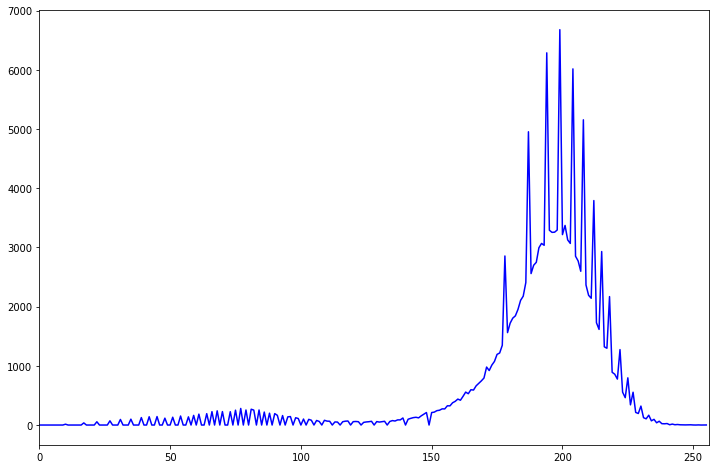

In [17]:
histograma(ans_norm)

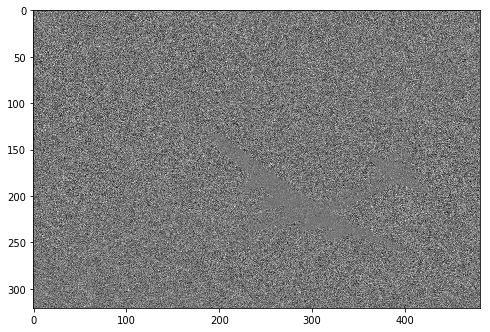

In [61]:
show(noisy-img*255)

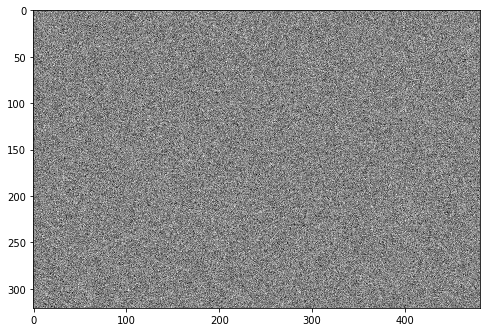

In [62]:
show(ans-ans2)

## Tornando o máximo = 1

In [18]:
img = img / img.max()

In [19]:
estatisticas(img)

Média: 0.67, variância: 0.02, desvio padrão: 0.15, mínimo: 0.00 e máximo: 1.00


In [20]:
ans = anscombe(noisy)

In [21]:
estatisticas(ans)

Média: 21.55, variância: 10.10, desvio padrão: 3.18, mínimo: 1.22 e máximo: 28.45


In [22]:
ans = ans - ans.mean()

In [23]:
estatisticas(ans)

Média: 0.00, variância: 10.10, desvio padrão: 3.18, mínimo: -20.33 e máximo: 6.90


In [27]:
myimage = 100 * np.ones((100,100))
imageplusnoise = np.random.poisson(lam=myimage, size=None)
noiseonlyimage = imageplusnoise - myimage
np.var(noiseonlyimage)

98.17778391000002